In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix

# BERETE

In [3]:
from sklearn.model_selection import GridSearchCV 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler



### Importation des données

In [4]:
df_train=pd.read_csv('Patients_train.csv')

In [6]:
df_val=pd.read_csv('Patients_test.csv')

In [9]:
df_train

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,37.1,12.2,4.16,16.7,299,29.3,32.9,89.2,47,F,1
1,35.9,12.4,4.12,11.8,152,30.1,34.5,87.1,60,M,1
2,30.8,11.5,4.05,34.9,523,28.4,37.3,76.0,66,M,0
3,41.3,13.9,4.54,10.6,284,30.6,33.7,91.0,71,M,0
4,37.3,11.9,4.00,5.9,196,29.8,31.9,93.3,66,F,0
...,...,...,...,...,...,...,...,...,...,...,...
2311,28.5,9.4,3.61,28.3,121,26.0,33.0,78.9,67,M,0
2312,37.0,12.4,4.07,3.7,134,30.5,33.5,90.9,50,F,1
2313,32.8,10.6,3.86,18.2,195,27.5,32.3,85.0,68,M,1
2314,43.4,14.7,4.75,11.5,289,30.9,33.9,91.4,73,M,0


### Preprocessing

In [7]:
df_train['SEX'].replace(['M','F'],[0,1],inplace=True)

In [8]:
df_val['SEX'].replace(['M','F'],[0,1],inplace=True)

In [9]:
df_val=df_val.set_index('trustii_id')

In [10]:
df_val

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
trustii_id,,,,,,,,,,
1,24.1,7.6,2.53,5.8,248,30.0,31.5,95.3,81,0
2,42.2,13.1,6.03,7.7,265,21.7,31.0,70.0,21,0
3,38.3,13.0,4.37,8.4,145,29.7,33.9,87.6,82,0
4,39.0,11.6,5.57,9.0,353,20.8,29.7,70.0,40,0
5,37.7,12.4,4.31,9.8,284,28.8,32.9,87.5,46,1
...,...,...,...,...,...,...,...,...,...,...
989,37.1,11.8,4.04,9.0,301,29.2,31.8,91.8,76,1
990,41.1,13.7,4.95,3.8,204,27.7,33.3,83.0,25,1
991,34.4,11.2,3.47,9.3,256,32.3,32.6,99.1,63,1


In [10]:
corr=df_train.loc[:,:].corr()

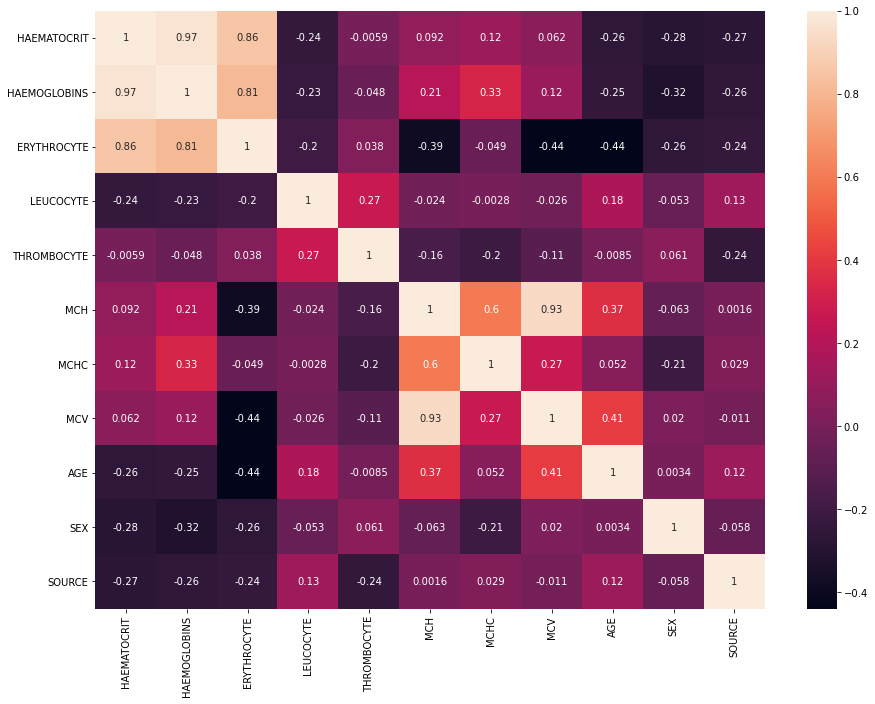

In [11]:
corr=df_train.loc[:,:].corr()
plt.figure(figsize=(15,11))

sns.heatmap(corr, 
xticklabels=corr.columns, 
yticklabels=corr . columns, annot=True)
plt.show()

In [106]:
print(df_train.groupby('SEX').mean()['SOURCE'])

SEX
0    0.425061
1    0.368037
Name: SOURCE, dtype: float64


# Disposons nous d'un jeu de données equilibré?

In [11]:
print(df_train.groupby('SOURCE').size())

SOURCE
0    1394
1     922
dtype: int64


In [12]:
df_train=df_train.drop(['MCH'],axis=1)

In [13]:
df_val=df_val.drop(['MCH'],axis=1)

In [15]:
df_train

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCHC,MCV,AGE,SEX,SOURCE
0,37.1,12.2,4.16,16.7,299,32.9,89.2,47,1,1
1,35.9,12.4,4.12,11.8,152,34.5,87.1,60,0,1
2,30.8,11.5,4.05,34.9,523,37.3,76.0,66,0,0
3,41.3,13.9,4.54,10.6,284,33.7,91.0,71,0,0
4,37.3,11.9,4.00,5.9,196,31.9,93.3,66,1,0
...,...,...,...,...,...,...,...,...,...,...
2311,28.5,9.4,3.61,28.3,121,33.0,78.9,67,0,0
2312,37.0,12.4,4.07,3.7,134,33.5,90.9,50,1,1
2313,32.8,10.6,3.86,18.2,195,32.3,85.0,68,0,1
2314,43.4,14.7,4.75,11.5,289,33.9,91.4,73,0,0


### Separation des données en des variables de predictions et variable a predire

In [16]:
X_train=df_train.iloc[:,0:-1]
Y_train=df_train['SOURCE'].values

In [17]:
X_train

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCHC,MCV,AGE,SEX
0,37.1,12.2,4.16,16.7,299,32.9,89.2,47,1
1,35.9,12.4,4.12,11.8,152,34.5,87.1,60,0
2,30.8,11.5,4.05,34.9,523,37.3,76.0,66,0
3,41.3,13.9,4.54,10.6,284,33.7,91.0,71,0
4,37.3,11.9,4.00,5.9,196,31.9,93.3,66,1
...,...,...,...,...,...,...,...,...,...
2311,28.5,9.4,3.61,28.3,121,33.0,78.9,67,0
2312,37.0,12.4,4.07,3.7,134,33.5,90.9,50,1
2313,32.8,10.6,3.86,18.2,195,32.3,85.0,68,0
2314,43.4,14.7,4.75,11.5,289,33.9,91.4,73,0


In [20]:
Y_train

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

### On partage des données en train et test set dans un premier temps

In [22]:
percentage_donnees_test = 0.20
X, X_VAL, Y, Y_VAL=train_test_split(X_train,Y_train, test_size=percentage_donnees_test)

### Voir quel est le modele le plus performant

In [24]:
modele=[DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),GradientBoostingClassifier(),LogisticRegression()]

### On cree une fonction à ce sujet

In [10]:
def model_train(liste):
    dt={}
    for model in liste:
        M=model
        M.fit(X,Y)
        pred=M.predict(X_VAL)
        dt[M]=accuracy_score(pred,Y_VAL)
        
    return dt

In [4]:
?RandomForestClassifier

In [30]:
model_train(modele)

{DecisionTreeClassifier(): 0.6443965517241379,
 KNeighborsClassifier(): 0.6982758620689655,
 RandomForestClassifier(): 0.771551724137931,
 SVC(): 0.6918103448275862,
 GradientBoostingClassifier(): 0.7521551724137931,
 LogisticRegression(): 0.7133620689655172}

### RandomForestClassifier celui qui nous donne le plus grand score

### Calibrage

In [31]:

random_forest = [{'n_estimators': range(100,200)},{'min_samples_split':range(2,50)},{'max_leaf_nodes':range(2,50)},{'min_samples_leaf':range(1,50)},{'criterion':["gini", "entropy"]},{'max_features': ["auto", "sqrt", "log2"]}]

In [111]:
random_forest = [ {'n_estimators':np.arange(100,200)}, {'criterion':["gini", "entropy"]},{'class_weight':["balanced", "balanced_subsample"]}, {'min_samples_split' :range(2,50)},
          {'min_samples_leaf' : range(1,50)},{'max_leaf_nodes' :range(2,50)},{'max_features' : ["auto","sqrt", "log2"]},{'bootstrap' : [True,False]},
                                            {'min_weight_fraction_leaf':[0,0.05,0.06,0.07,0.08,0.09,0.1]}]

In [21]:
random_forest = [ {'n_estimators':np.arange(100,200)}, {'criterion':["gini", "entropy"]},{'min_samples_split' :range(2,30)},
          {'min_samples_leaf' : range(1,30)},{'max_leaf_nodes' :range(2,30)},{'max_features' : ["auto","sqrt", "log2"]}]

In [282]:
random_tree= [{'criterion': ["gini", "entropy"]},{'splitter':["best", "random"]},
              {'max_depth':range(1,30)},{'min_samples_leaf':range(1,30)},{'max_features':["auto", "sqrt", "log2"]}]

In [122]:
grid=GridSearchCV(RandomForestClassifier(class_weight={0:1394}),random_forest,cv=10,verbose=True, n_jobs=-1 )

In [123]:
grid.fit(X_train,Y_train)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(class_weight={0: 1394}),
             n_jobs=-1,
             param_grid=[{'n_estimators': range(100, 200)},
                         {'min_samples_split': range(2, 50)},
                         {'max_leaf_nodes': range(2, 50)},
                         {'min_samples_leaf': range(1, 50)},
                         {'criterion': ['gini', 'entropy']},
                         {'max_features': ['auto', 'sqrt', 'log2']}],
             verbose=True)

In [126]:
grid.best_score_

0.7374626809971637

In [127]:
grid.best_params_

{'criterion': 'entropy'}

In [128]:
model=grid.best_estimator_

In [130]:
predic=model.predict(df_val)

In [129]:
df_val=df_val.drop('SOURCE',axis=1)

In [131]:
df_val['SOURCE']=predic

In [132]:
predic

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,

In [39]:
df_val

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCHC,MCV,AGE,SEX,SOURCE
trustii_id,,,,,,,,,,
1,24.1,7.6,2.53,5.8,248,31.5,95.3,81,0,0
2,42.2,13.1,6.03,7.7,265,31.0,70.0,21,0,0
3,38.3,13.0,4.37,8.4,145,33.9,87.6,82,0,0
4,39.0,11.6,5.57,9.0,353,29.7,70.0,40,0,0
5,37.7,12.4,4.31,9.8,284,32.9,87.5,46,1,0
...,...,...,...,...,...,...,...,...,...,...
989,37.1,11.8,4.04,9.0,301,31.8,91.8,76,1,0
990,41.1,13.7,4.95,3.8,204,33.3,83.0,25,1,0
991,34.4,11.2,3.47,9.3,256,32.6,99.1,63,1,1


In [133]:
df_val.to_csv('my_submission1.csv',encoding='UTF-8')

In [6]:
from joblib import dump,load

In [7]:
Model=load("ModelPatient")

FileNotFoundError: [Errno 2] No such file or directory: 'ModelPatient'

In [137]:
Model

RandomForestClassifier(n_estimators=103)

In [198]:
dump(model, "ModelPatient")

['ModelPatient']